In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report

import warnings
warnings.filterwarnings("ignore")

In [65]:
iris = load_iris()
# x = iris.data
# y = iris.target

In [66]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

In [67]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [69]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [70]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [71]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [72]:
colors = ['#7E57C2', '#4DB6AC', '#303F9F']
palette = dict(zip(iris.target_names, colors))

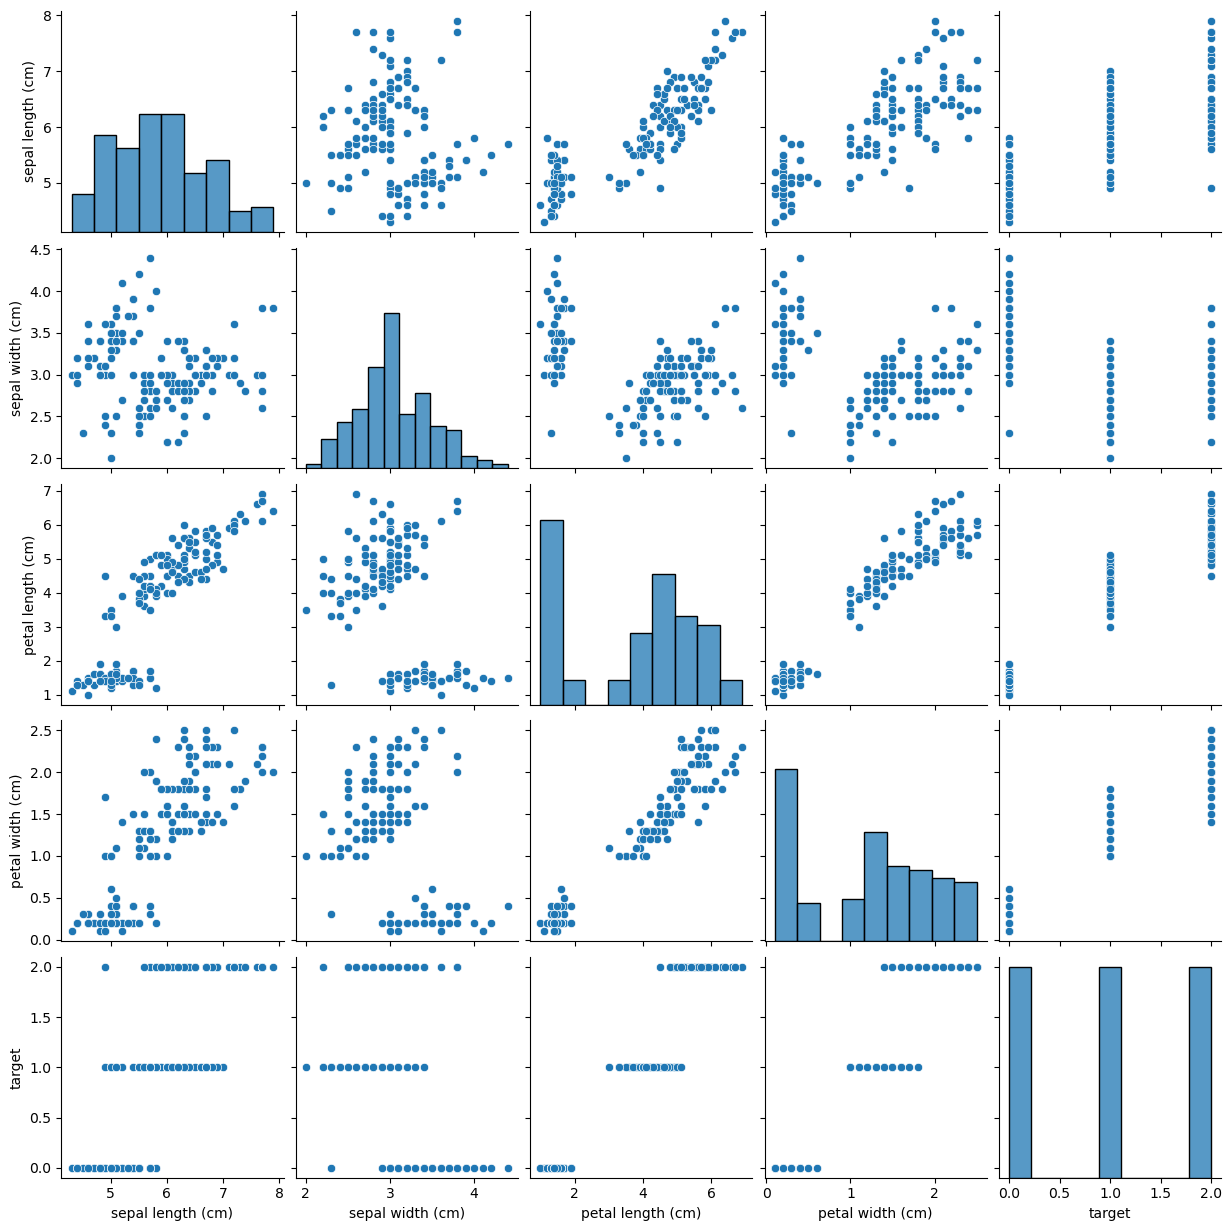

In [73]:
sns.pairplot(df);

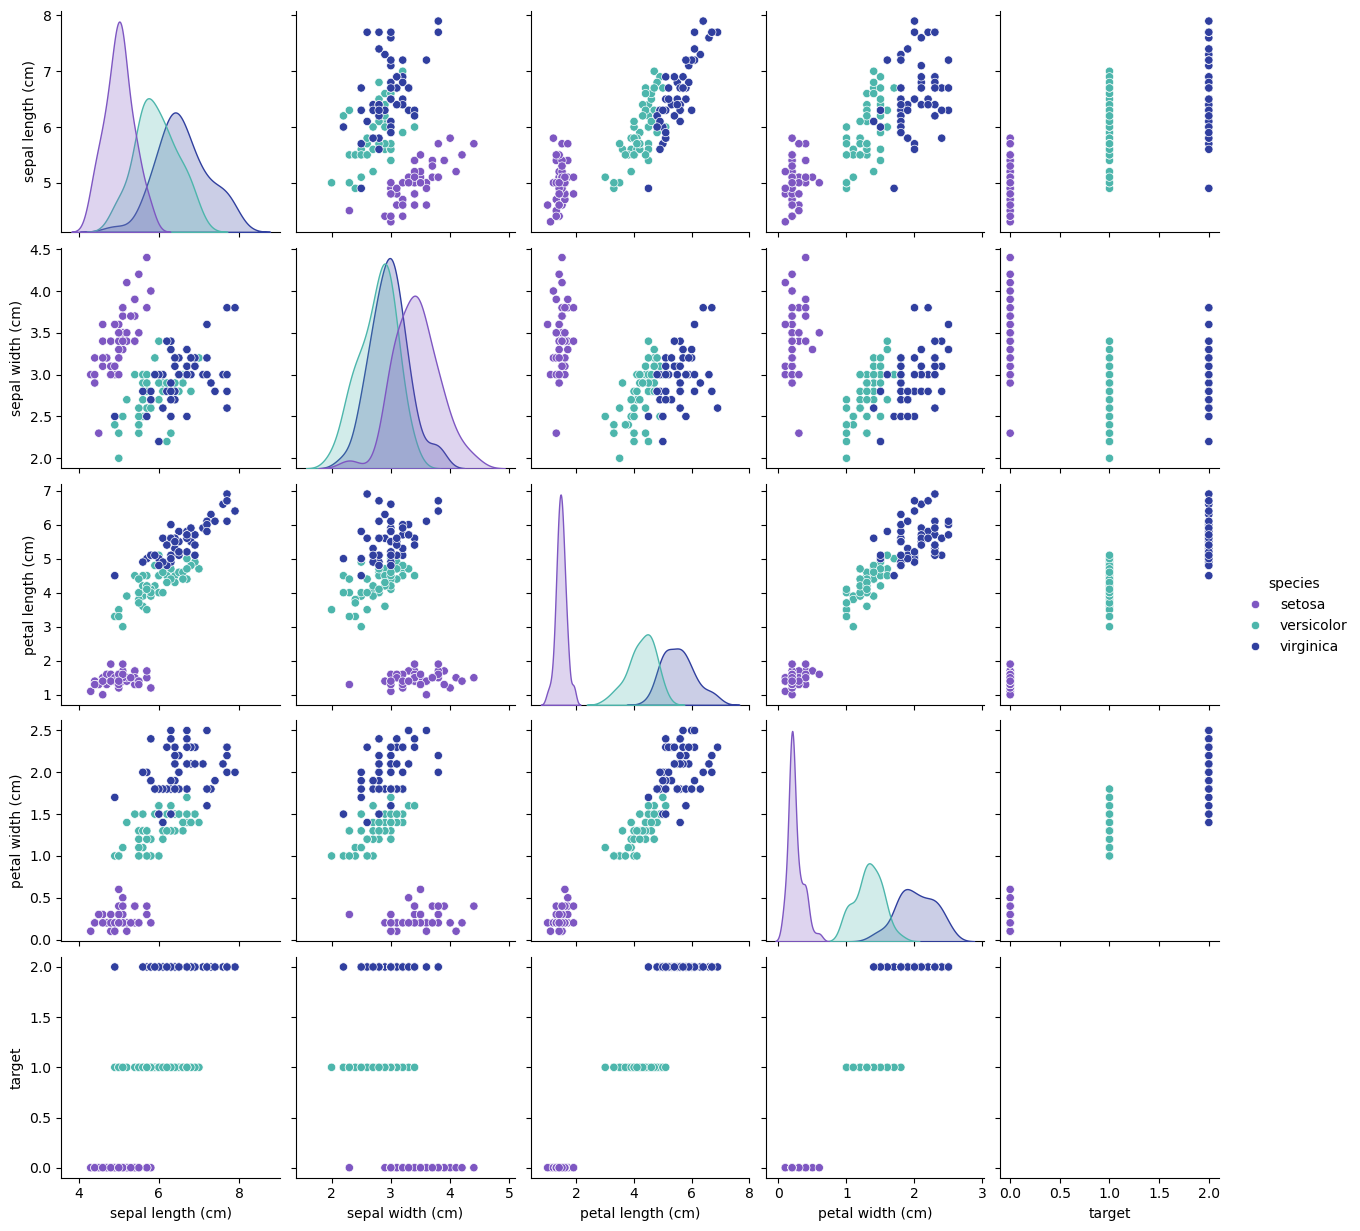

In [74]:
sns.pairplot(df, hue='species', palette=palette);

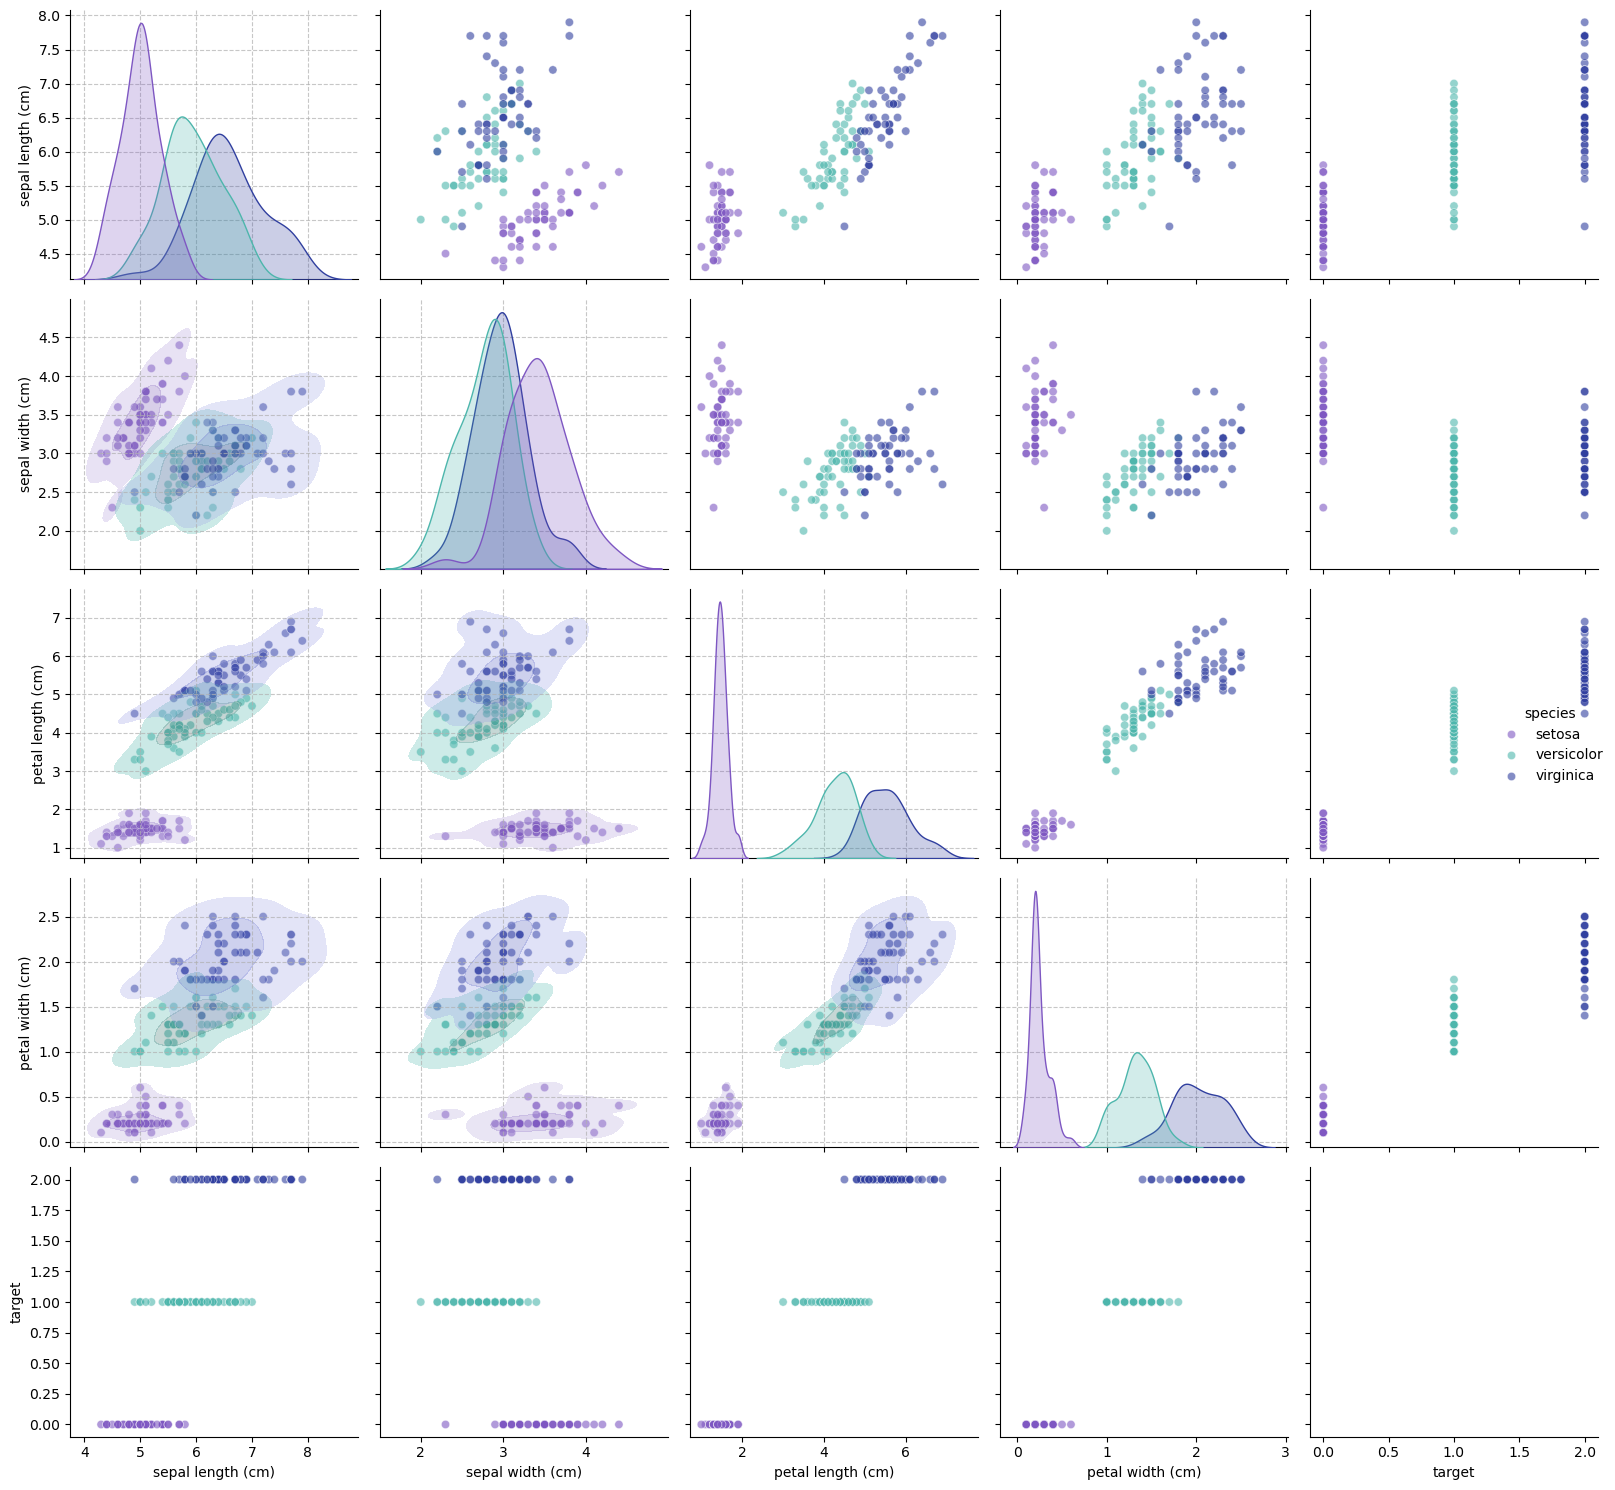

In [75]:
g = sns.pairplot(
    data=df,
    hue='species',
    # corner=True,
    height=3,
    diag_kind='kde',
    palette=palette,
    plot_kws={'alpha': 0.6}
)

for i in range(len(df.columns)-2):
    for j in range(len(df.columns)-2):
        if i > j:
            ax = g.axes[i, j]
            ax.grid(True, linestyle='--', alpha=0.7)
            for idx, target in enumerate(df['species'].unique()):
                subset = df[df['species'] == target]
                sns.kdeplot(
                    data=subset,
                    x=df.columns[j],
                    y=df.columns[i],
                    ax=ax,
                    levels=3,
                    alpha=0.3,
                    fill=True,
                    color=colors[idx]
                )
        

        if i == j and i < len(df.columns)-2:
            g.axes[i, i].grid(True, linestyle='--', alpha=0.7)          

plt.tight_layout()
plt.show()

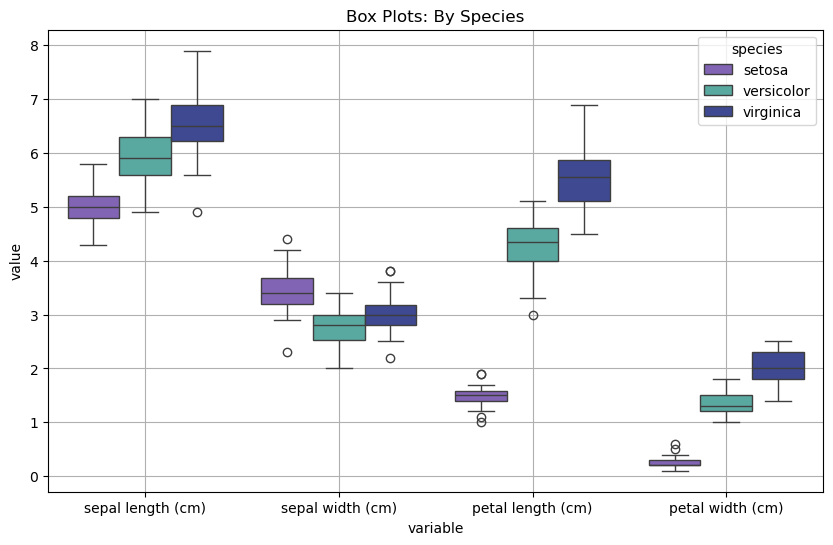

In [76]:
plt.figure(figsize=(10,6))
df_melted = df.melt(id_vars=['species'], value_vars=iris.feature_names)
sns.boxplot(x='variable', y='value', data=df_melted, hue='species', palette=palette)
plt.title('Box Plots: By Species')
plt.grid()
plt.show()

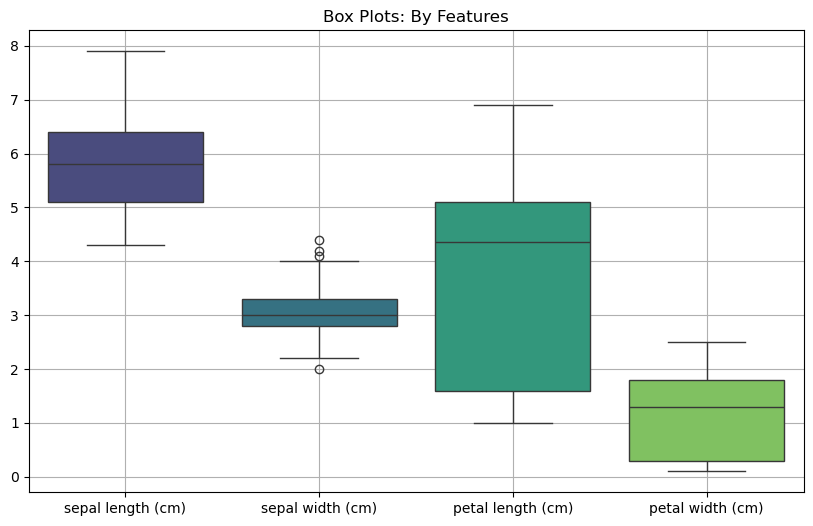

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:, :4], palette='viridis')
plt.title('Box Plots: By Features')
plt.grid()
plt.show()

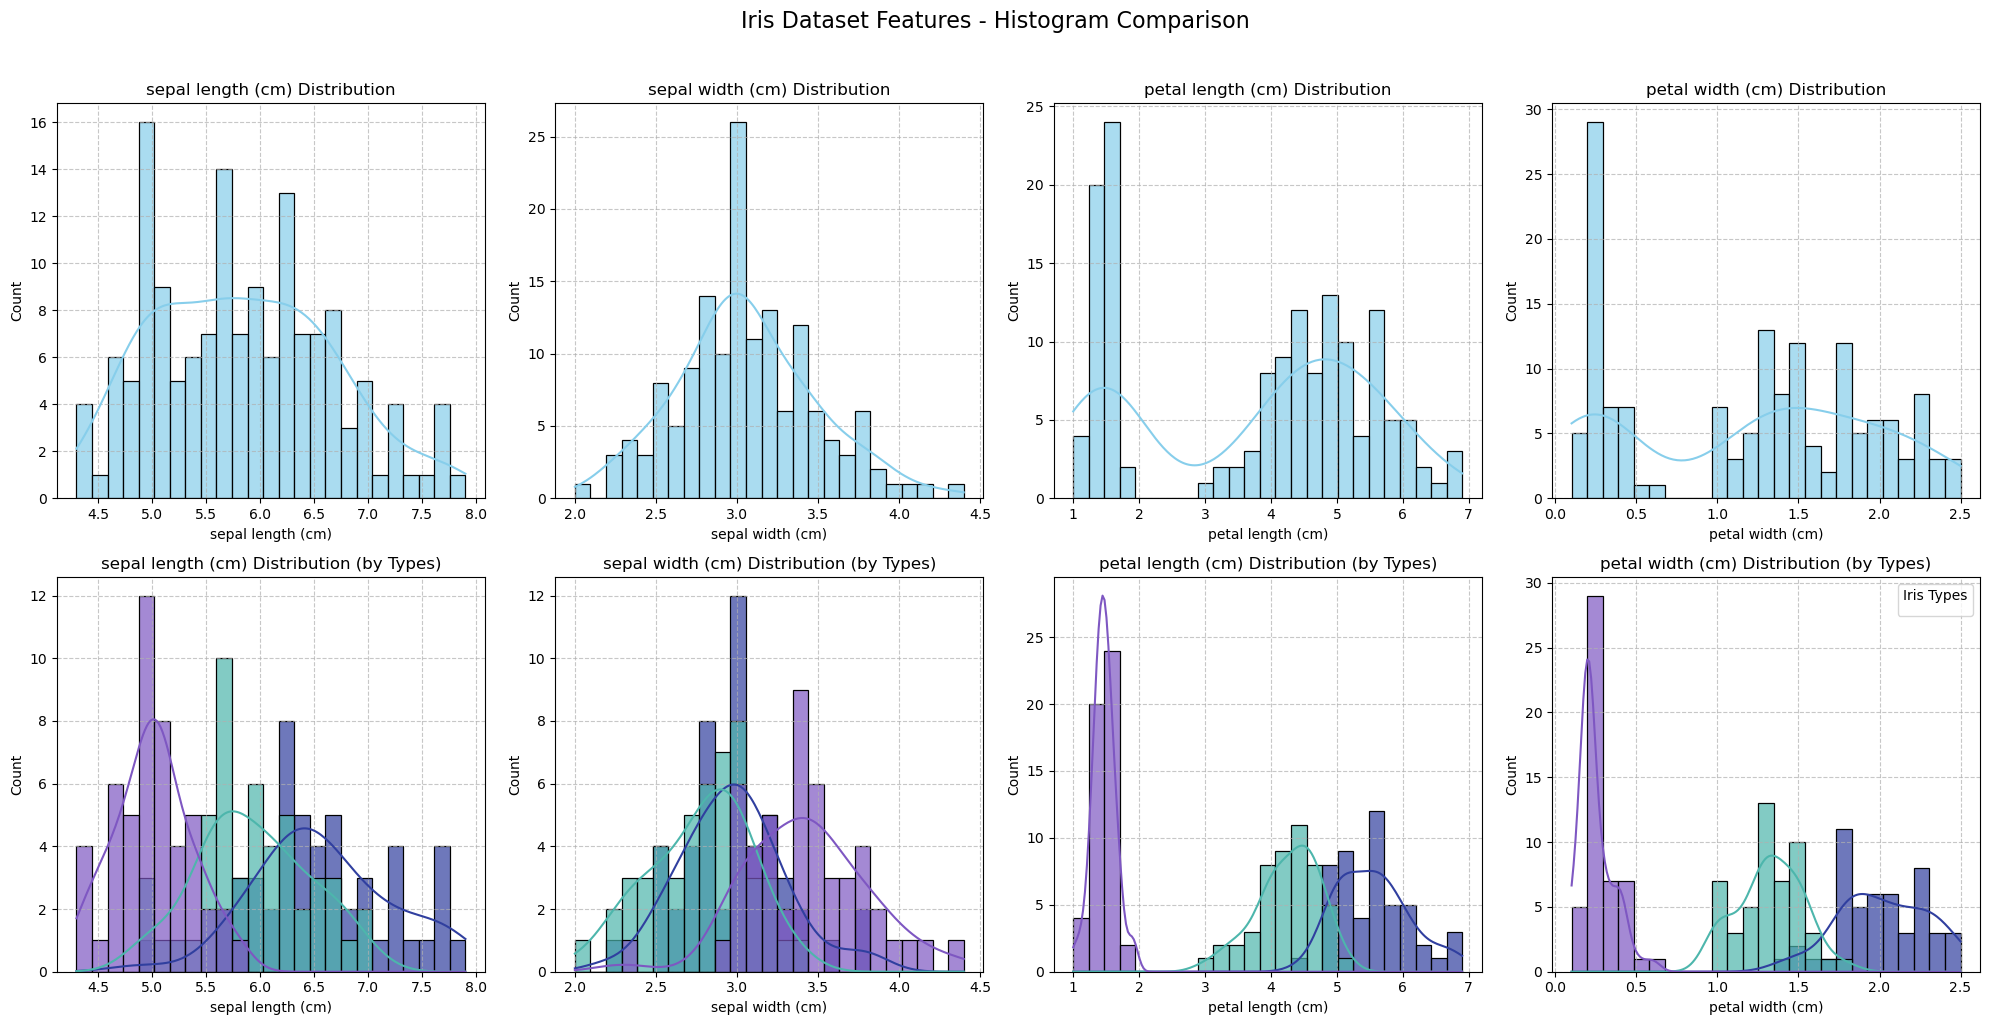

In [78]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Iris Dataset Features - Histogram Comparison', size=16, y=1.02)

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        bins=25,
        ax=axes[0, idx],
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    axes[0, idx].grid(True, linestyle='--', alpha=0.7)
    axes[0, idx].set_title(f'{feature} Distribution')

for idx, feature in enumerate(iris.feature_names):
    sns.histplot(
        data=df,
        kde=True,
        x=feature,
        hue='species',
        bins=25,
        ax=axes[1, idx],
        palette=palette,
        alpha=0.7,
        multiple="layer"
    )
    axes[1, idx].grid(True, linestyle='--', alpha=0.7)
    axes[1, idx].set_title(f'{feature} Distribution (by Types)')
    if idx == 3:
        axes[1, idx].legend(title='Iris Types')
    else:
        axes[1, idx].get_legend().remove()

plt.tight_layout()
plt.show()

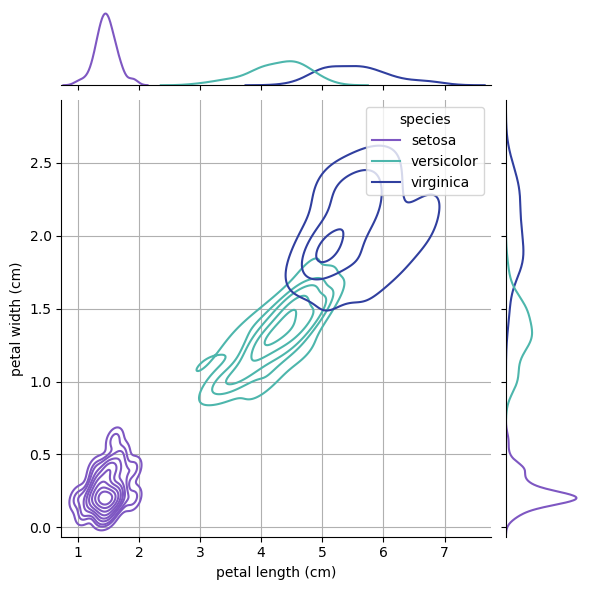

In [79]:
sns.jointplot(x="petal length (cm)", y="petal width (cm)", hue = 'species', data=df, kind="kde", palette=palette)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

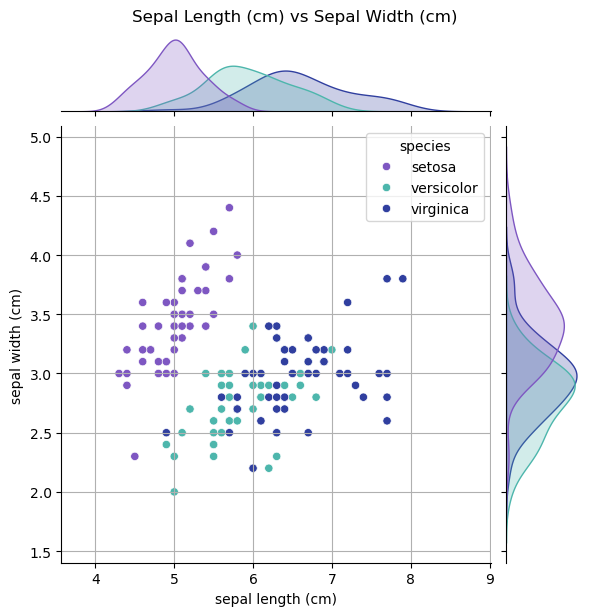

In [80]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Sepal Length (cm) vs Sepal Width (cm)', y=1.02)
plt.grid()
plt.show()

<Figure size 1000x800 with 0 Axes>

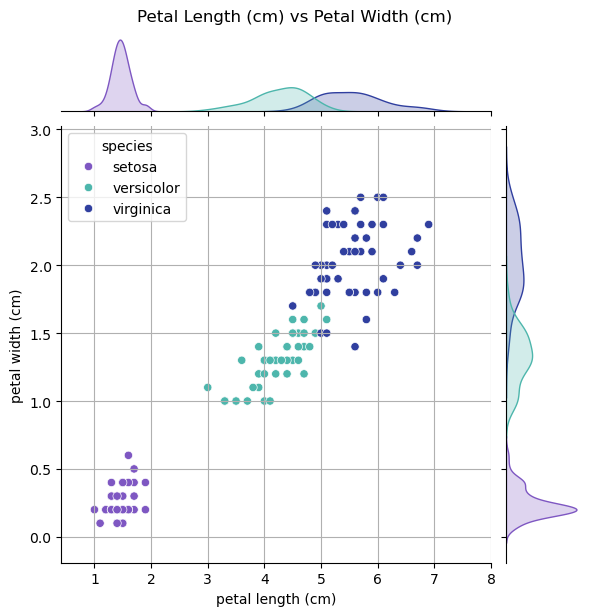

In [81]:
plt.figure(figsize=(10, 8))
sns.jointplot(data=df, x='petal length (cm)', y='petal width (cm)', 
              hue='species', kind='scatter', palette=palette)
plt.suptitle('Petal Length (cm) vs Petal Width (cm)', y=1.02)
plt.grid()
plt.show()

In [82]:
numeric_df = df.select_dtypes(include=['number'])


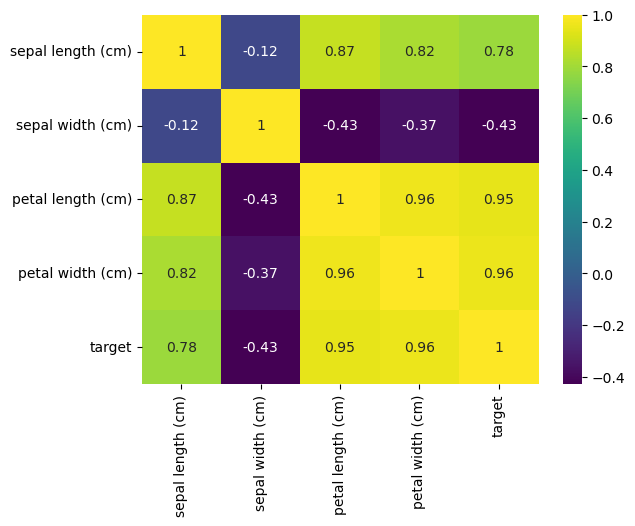

In [83]:
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [84]:
x = iris.data
y = iris.target


In [85]:
print('First 5 rows of x:\n', x[:5])
print('\nx.shape:', x.shape)
print('\nFirst 5 rows of y:\n', y[:5])
print('\ny.shape:', y.shape)

First 5 rows of x:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x.shape: (150, 4)

First 5 rows of y:
 [0 0 0 0 0]

y.shape: (150,)


In [86]:
label_binarizer = LabelBinarizer()
y_encoded = label_binarizer.fit_transform(y)

In [87]:
print('Difference Between y And y_encoded After Using Label Binarizer\n')
print('y: \n', y[0:5])
print('\ny_encoded:\n', y_encoded[:5])
print('\ny shape:', y.shape)
print('\ny_encoded shape:',y_encoded.shape)

Difference Between y And y_encoded After Using Label Binarizer

y: 
 [0 0 0 0 0]

y_encoded:
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]

y shape: (150,)

y_encoded shape: (150, 3)


In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [89]:
print('Difference Between x And x_scaled After Using Standard Scaler\n')
print('x: \n', x[0:5])
print('\nx_scaled:\n', x_scaled[:5])

Difference Between x And x_scaled After Using Standard Scaler

x: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

x_scaled:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, train_size=0.8, random_state=42)

In [91]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)


In [92]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu', shape=(int(input_shape[1]), self.units),
                                                   initializer = "uniform", trainable = True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis = 1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_out_shape(self, input_shape):
        return (input_shape[0], self.units)

In [93]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(4,)))
    model.add(RBFLayer(10, 0.5))
    model.add(Dense(3, activation = "softmax"))

    model.compile(optimizer = "adam", metrics = ["accuracy"],
                 loss = "categorical_crossentropy")
    return model

In [94]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    restore_best_weights=True,
    verbose=1
)

In [95]:
model = build_model()

In [96]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=4,
    validation_split=0.3,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4481 - loss: 1.3262 - val_accuracy: 0.5833 - val_loss: 1.4017
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6270 - loss: 1.2377 - val_accuracy: 0.6111 - val_loss: 1.3357
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5525 - loss: 1.2431 - val_accuracy: 0.5833 - val_loss: 1.2762
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5464 - loss: 1.1816 - val_accuracy: 0.5833 - val_loss: 1.2238
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5749 - loss: 1.1452 - val_accuracy: 0.5833 - val_loss: 1.1775
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6008 - loss: 1.1108 - val_accuracy: 0.5278 - val_loss: 1.1291
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5443 - loss: 1.0840 - val_accuracy: 0.5278 - val_loss: 1.0877
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5818 - loss: 1.0683 - val_accuracy: 0.5278 - val

In [97]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9333
Test Loss: 0.4095


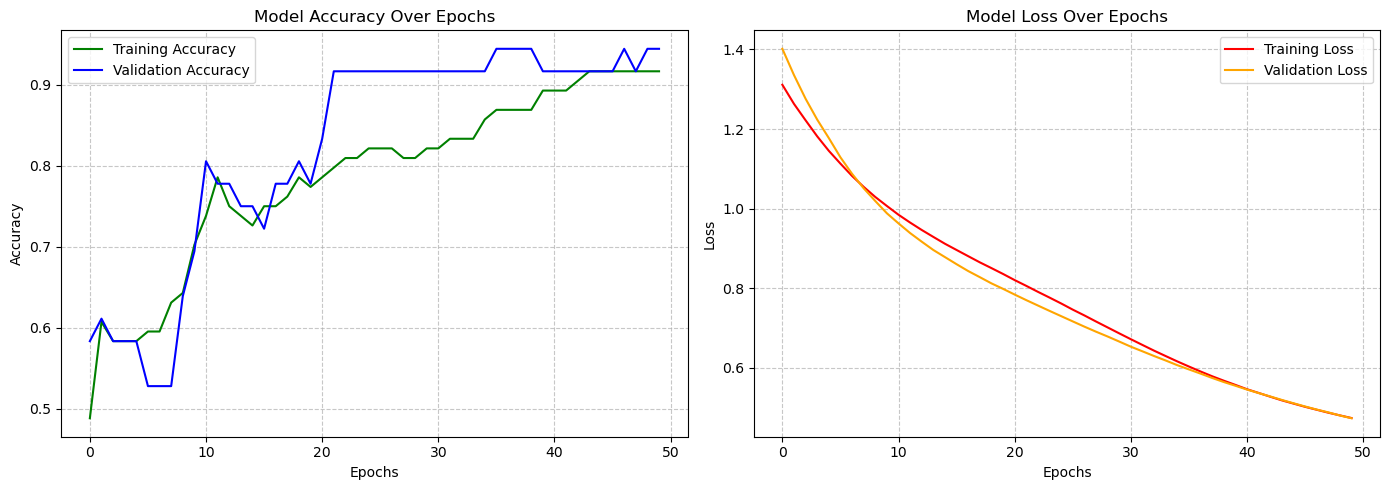

In [98]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Model Accuracy Over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Model Loss Over Epochs')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


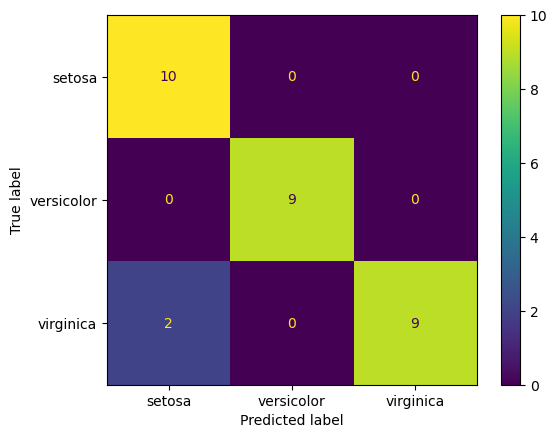

In [99]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='viridis')
plt.grid(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


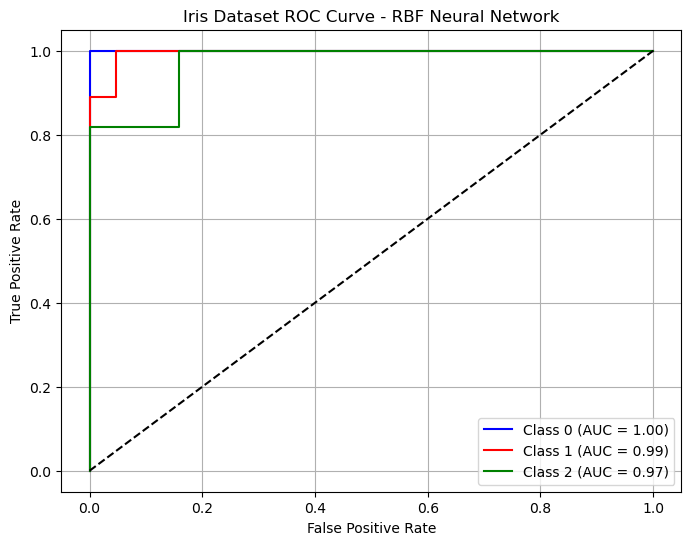

In [100]:
y_pred_proba = model.predict(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Iris Dataset ROC Curve - RBF Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [101]:
y_test = y_test.ravel() 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


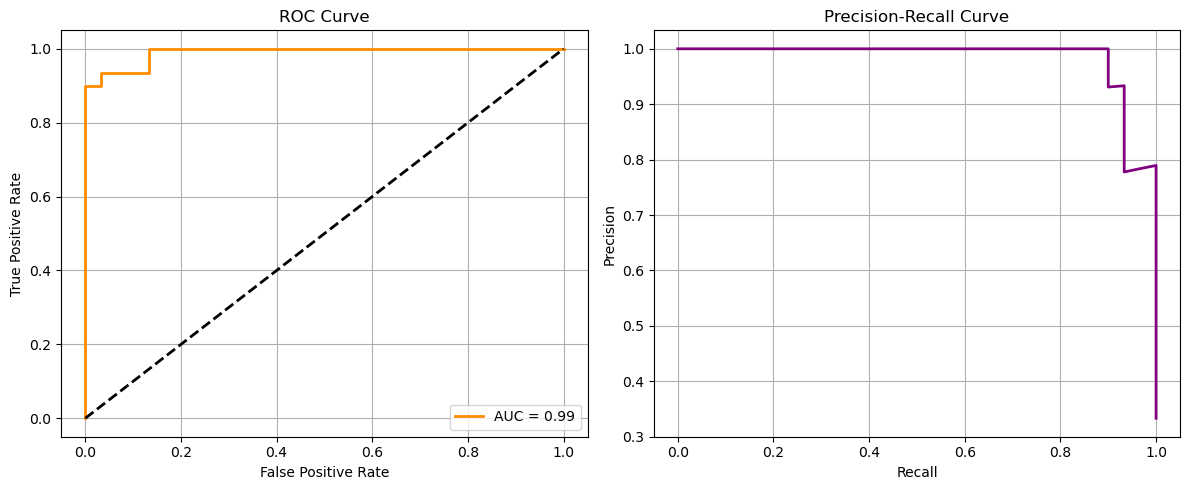

In [102]:
y_pred_proba = model.predict(x_test).ravel()
y_pred_class = (y_pred_proba >= 0.5).astype(int)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.subplot(1,2,2)
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

In [103]:
print("\n🧾 Classification Report:\n")
print(classification_report(y_test, y_pred_class))


🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.90      0.95        30

    accuracy                           0.97        90
   macro avg       0.98      0.95      0.96        90
weighted avg       0.97      0.97      0.97        90



In [104]:
# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2
EPOCHS = 50
BATCH_SIZE = 32

In [105]:
def load_and_preprocess_iris():
    """Load and preprocess the Iris dataset."""
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].apply(lambda x: iris.target_names[x])
    return df, iris.data, iris.target

def build_keras_model(input_dim, num_classes):
    """Build and compile a Keras neural network model."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [106]:
from sklearn.model_selection import StratifiedKFold

def cross_validate_model(X, y, model_fn, n_splits=5):
    """Perform k-fold cross-validation."""
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    scores = []
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        
        lb = LabelBinarizer()
        y_train = lb.fit_transform(y_train)
        y_val = lb.transform(y_val)
        
        model = model_fn(X_train.shape[1], y_train.shape[1])
        model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
        score = model.evaluate(X_val, y_val, verbose=0)[1]
        scores.append(score)
    return np.mean(scores), np.std(scores)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import numpy as np

# Placeholder data (replace with your actual data)
# Example: Assuming input_dim=10 and num_classes=3
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.randint(0, 3, size=(100, 3))  # 100 samples, 3 classes (one-hot encoded)
EPOCHS = 50
BATCH_SIZE = 32

def build_advanced_model(input_dim, num_classes):
    """Build a Keras model with dropout and regularization."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
input_dim = X_train.shape[1]  # Number of features
num_classes = y_train.shape[1]  # Number of classes
model = build_advanced_model(input_dim, num_classes)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Training
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
          validation_split=0.2, callbacks=[early_stopping, reduce_lr, checkpoint])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.3063 - loss: 4.0290 - val_accuracy: 0.2000 - val_loss: 3.6274 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4570 - loss: 4.0466 - val_accuracy: 0.2500 - val_loss: 3.6346 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3945 - loss: 4.1034 - val_accuracy: 0.3000 - val_loss: 3.6384 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4125 - loss: 4.0800 - val_accuracy: 0.3000 - val_loss: 3.6421 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3930 - loss: 4.1719 - val_accuracy: 0.3000 - val_loss: 3.6423 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2891 - loss: 4.1071 - val_accuracy: 0.3000 - val_loss: 3.6409 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4250 - loss: 4.1197 - val_accuracy: 0.3000

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.3333 - loss: 1.8795 - val_accuracy: 0.5000 - val_loss: 1.3937 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2695 - loss: 1.8987 - val_accuracy: 1.0000 - val_loss: 1.3803 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4909 - loss: 1.6225 - val_accuracy: 0.5000 - val_loss: 1.4089 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4375 - loss: 1.5837 - val_accuracy: 0.5000 - val_loss: 1.4174 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4805 - loss: 1.5043 - val_accuracy: 0.5000 - val_loss: 1.3820 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4896 - loss: 1.4827 - val_accuracy: 0.5000 - val_loss: 1.3157 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5391 - loss: 1.4090 - val_accuracy: 0.5000

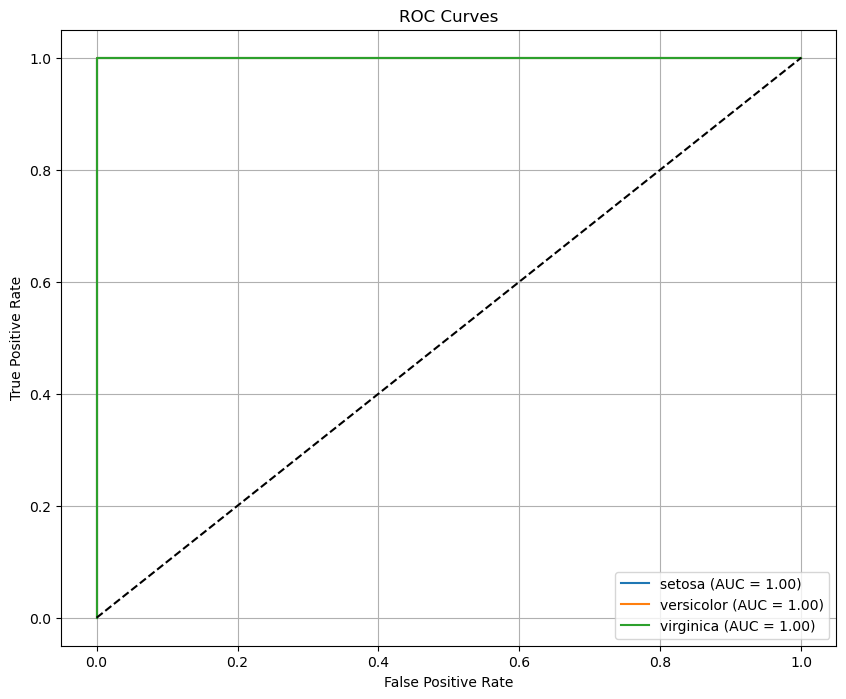

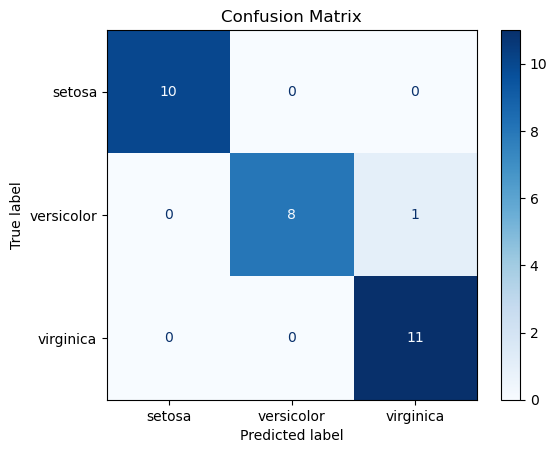

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Load Iris dataset
iris = load_iris()
X = iris.data  # Shape: (150, 4)
y = iris.target  # Integer labels (0, 1, 2)
y_one_hot = to_categorical(y)  # One-hot encoded: (150, 3)
classes = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define model building function
def build_advanced_model(input_dim, num_classes):
    """Build a Keras model with dropout and regularization."""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model with correct input dimension
input_dim = X_train.shape[1]  # 4 features for Iris
num_classes = y_train.shape[1]  # 3 classes
model = build_advanced_model(input_dim, num_classes)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Train model
EPOCHS = 50
BATCH_SIZE = 32
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
          validation_split=0.2, callbacks=[early_stopping, reduce_lr, checkpoint])

# Get predictions
y_pred_proba = model.predict(X_test)  # Predicted probabilities: (n_samples, 3)

# Define ROC plotting function
def plot_multiclass_roc(y_true, y_pred_proba, classes, title='ROC Curves'):
    """Plot ROC curves for multiclass classification."""
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(classes):
        # Ensure y_true is one-hot encoded for roc_curve
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot ROC curves
plot_multiclass_roc(y_test, y_pred_proba, classes)

# Confusion Matrix
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [110]:
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_and_preprocess_iris():
    """Load and preprocess the Iris dataset with error handling."""
    try:
        iris = load_iris()
        df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        df['target'] = iris.target
        df['species'] = df['target'].apply(lambda x: iris.target_names[x])
        
        if df.isnull().sum().sum() > 0:
            logging.warning("Missing values detected in the dataset.")
        logging.info("Iris dataset loaded successfully.")
        return df, iris.data, iris.target
    except Exception as e:
        logging.error(f"Failed to load dataset: {str(e)}")
        raise

2025-06-07 17:24:13,729 - WARNING - 5 out of the last 1631 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002182F43EE80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


2025-06-07 17:24:13,948 - WARNING - Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


2025-06-07 17:24:14,169 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:14,391 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,391 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,394 - INFO - phi = array([-0.0116551 , -0.02092416, -0.01526766,  0.00310574])
2025-06-07 17:24:14,396 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,396 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,400 - INFO - phi = array([0.00549039, 0.00872901, 0.03034306, 0.0052956 ])
2025-06-07 17:24:14,400 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,402 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,404 - INFO - phi = array([ 0.0061647 ,  0.01219513, -0.01507541, -0.00840137])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


2025-06-07 17:24:14,544 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:14,780 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,781 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,783 - INFO - phi = array([ 0.00195524,  0.05931871,  0.03843748, -0.00745899])
2025-06-07 17:24:14,786 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,786 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,788 - INFO - phi = array([-0.00633636, -0.025952  , -0.03259403,  0.01287566])
2025-06-07 17:24:14,791 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:14,791 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:14,794 - INFO - phi = array([ 0.00438113, -0.0333667 , -0.00584345, -0.00541666])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


2025-06-07 17:24:14,884 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:15,100 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,102 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,105 - INFO - phi = array([-0.05409929, -0.03049222, -0.05563679, -0.00424875])
2025-06-07 17:24:15,113 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,113 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,127 - INFO - phi = array([ 0.04280305,  0.00228442, -0.05210542, -0.02125462])
2025-06-07 17:24:15,131 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,133 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,144 - INFO - phi = array([0.01129625, 0.02820782, 0.10774223, 0.02550338])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


2025-06-07 17:24:15,315 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2025-06-07 17:24:15,483 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,483 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,483 - INFO - phi = array([-0.00811338, -0.01294515, -0.00910723,  0.00514686])
2025-06-07 17:24:15,483 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,483 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,483 - INFO - phi = array([ 0.00171976,  0.00674868,  0.0324812 , -0.00248432])
2025-06-07 17:24:15,493 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,494 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,495 - INFO - phi = array([ 0.00639363,  0.00619649, -0.02337397, -0.00266253])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2025-06-07 17:24:15,580 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:15,809 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,809 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,812 - INFO - phi = array([-0.03330204, -0.02102284, -0.0163941 ,  0.00359564])
2025-06-07 17:24:15,814 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,816 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,819 - INFO - phi = array([0.02872027, 0.00899855, 0.03267862, 0.00044743])
2025-06-07 17:24:15,819 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:15,819 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:15,824 - INFO - phi = array([ 0.00458175,  0.01202428, -0.01628454, -0.00404309])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


2025-06-07 17:24:15,911 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:16,150 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,150 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,152 - INFO - phi = array([ 0.01317073,  0.02679892,  0.03654128, -0.00504621])
2025-06-07 17:24:16,152 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,152 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,158 - INFO - phi = array([-0.00975164, -0.01115899, -0.03436707,  0.01242002])
2025-06-07 17:24:16,158 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,160 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,163 - INFO - phi = array([-0.00341909, -0.01563993, -0.00217419, -0.0073738 ])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


2025-06-07 17:24:16,295 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-06-07 17:24:16,637 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,642 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,649 - INFO - phi = array([ 0.00339252, -0.01276818,  0.01548039,  0.00465901])
2025-06-07 17:24:16,653 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,655 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,664 - INFO - phi = array([-0.01000174,  0.00645252,  0.02866092,  0.00187087])
2025-06-07 17:24:16,668 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:16,668 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:16,682 - INFO - phi = array([ 0.00660923,  0.00631566, -0.04414132, -0.00652988])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


2025-06-07 17:24:16,799 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-06-07 17:24:17,046 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,047 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,050 - INFO - phi = array([-0.03504038,  0.0027336 , -0.02488772,  0.00473696])
2025-06-07 17:24:17,051 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,051 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,058 - INFO - phi = array([ 0.02916489,  0.00100203,  0.02366653, -0.02461937])
2025-06-07 17:24:17,059 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,064 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,068 - INFO - phi = array([ 0.00587549, -0.00373563,  0.00122119,  0.01988242])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


2025-06-07 17:24:17,186 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:17,324 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,324 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,327 - INFO - phi = array([-0.01488625, -0.06734106, -0.01061794,  0.00322671])
2025-06-07 17:24:17,327 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,329 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,332 - INFO - phi = array([ 0.00912632,  0.01920572,  0.03260366, -0.00316104])
2025-06-07 17:24:17,333 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,333 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,337 - INFO - phi = array([ 5.75991693e-03,  4.81353307e-02, -2.19857447e-02, -6.56921623e-05])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


2025-06-07 17:24:17,417 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:17,556 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,556 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,560 - INFO - phi = array([-0.00307474, -0.02929595,  0.00631118,  0.00376601])
2025-06-07 17:24:17,561 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,563 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,566 - INFO - phi = array([-0.00468852,  0.01362113,  0.03437875,  0.00440973])
2025-06-07 17:24:17,566 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,568 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,571 - INFO - phi = array([ 0.00776325,  0.01567481, -0.04068993, -0.00817574])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


2025-06-07 17:24:17,680 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:17,813 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,814 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,815 - INFO - phi = array([-0.02322747,  0.0111152 , -0.02583498,  0.00519891])
2025-06-07 17:24:17,817 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,819 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,821 - INFO - phi = array([ 0.01628378, -0.00099366,  0.02156462, -0.01579064])
2025-06-07 17:24:17,822 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:17,822 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:17,825 - INFO - phi = array([ 0.00694368, -0.01012155,  0.00427035,  0.01059173])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


2025-06-07 17:24:17,912 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:18,093 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,095 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,098 - INFO - phi = array([ 0.0370018 , -0.00546866,  0.03712467, -0.00699012])
2025-06-07 17:24:18,099 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,101 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,103 - INFO - phi = array([-0.01687727,  0.00266969, -0.03416403,  0.01492801])
2025-06-07 17:24:18,106 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,106 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,110 - INFO - phi = array([-0.02012452,  0.00279897, -0.00296063, -0.00793788])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


2025-06-07 17:24:18,207 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025-06-07 17:24:18,366 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,366 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,368 - INFO - phi = array([ 0.00860549,  0.03439306,  0.03177843, -0.00734258])
2025-06-07 17:24:18,368 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,370 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,372 - INFO - phi = array([-0.00752337, -0.01374182, -0.04481728,  0.01373409])
2025-06-07 17:24:18,372 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,372 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,376 - INFO - phi = array([-0.00108212, -0.02065124,  0.01303885, -0.00639151])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


2025-06-07 17:24:18,460 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:18,634 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,634 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,637 - INFO - phi = array([ 0.03325239,  0.00257054,  0.03841701, -0.00750103])
2025-06-07 17:24:18,640 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,641 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,644 - INFO - phi = array([-0.01616631, -0.00068596, -0.03205681,  0.01501853])
2025-06-07 17:24:18,645 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,646 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,649 - INFO - phi = array([-0.01708609, -0.00188459, -0.00636019, -0.00751749])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


2025-06-07 17:24:18,732 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:18,929 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,929 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,934 - INFO - phi = array([ 0.02664897,  0.05986757,  0.04089873, -0.00622791])
2025-06-07 17:24:18,935 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,936 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,939 - INFO - phi = array([-0.0136881 , -0.02446437, -0.0368687 ,  0.0121338 ])
2025-06-07 17:24:18,939 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:18,941 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:18,946 - INFO - phi = array([-0.01296086, -0.03540319, -0.00403002, -0.00590587])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2025-06-07 17:24:19,042 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:19,254 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,254 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,258 - INFO - phi = array([-0.01716624,  0.02008577, -0.01370887,  0.00578219])
2025-06-07 17:24:19,258 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,260 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,263 - INFO - phi = array([ 0.00860791, -0.00602901,  0.02979753, -0.00509523])
2025-06-07 17:24:19,263 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,265 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,269 - INFO - phi = array([ 0.00855833, -0.01405676, -0.01608865, -0.00068697])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


2025-06-07 17:24:19,385 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:19,565 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,566 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,570 - INFO - phi = array([-0.02266644, -0.00530145, -0.04475794,  0.00067532])
2025-06-07 17:24:19,570 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,570 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,575 - INFO - phi = array([ 0.01236137,  0.00098205, -0.01131856, -0.02085537])
2025-06-07 17:24:19,576 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,576 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,578 - INFO - phi = array([0.01030507, 0.00431939, 0.05607648, 0.02018003])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


2025-06-07 17:24:19,700 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


2025-06-07 17:24:19,945 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,945 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,947 - INFO - phi = array([ 0.00298765, -0.04510682,  0.00474745,  0.00352477])
2025-06-07 17:24:19,949 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,950 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,952 - INFO - phi = array([-0.00949209,  0.01997271,  0.03709208,  0.00685592])
2025-06-07 17:24:19,952 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:19,955 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:19,958 - INFO - phi = array([ 0.00650444,  0.02513412, -0.04183952, -0.01038067])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


2025-06-07 17:24:20,089 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:20,299 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,301 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,303 - INFO - phi = array([ 0.00020523, -0.02120167, -0.01113006,  0.00384953])
2025-06-07 17:24:20,304 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,304 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,306 - INFO - phi = array([-0.00785427,  0.00881266,  0.03104422,  0.00242301])
2025-06-07 17:24:20,306 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,311 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,314 - INFO - phi = array([ 0.00764905,  0.01238903, -0.01991414, -0.00627253])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2025-06-07 17:24:20,413 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


2025-06-07 17:24:20,640 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,641 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,644 - INFO - phi = array([-0.01964733, -0.02070498, -0.03924544,  0.00099229])
2025-06-07 17:24:20,644 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,645 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,647 - INFO - phi = array([ 0.01089903,  0.00342094, -0.00607431, -0.02119177])
2025-06-07 17:24:20,648 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,648 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,652 - INFO - phi = array([0.00874828, 0.01728402, 0.04531972, 0.02019946])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


2025-06-07 17:24:20,736 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:20,951 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,951 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,958 - INFO - phi = array([ 0.04118772,  0.01099393,  0.04187963, -0.00660467])
2025-06-07 17:24:20,959 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,959 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,963 - INFO - phi = array([-0.01931586, -0.00443037, -0.02779609,  0.0146916 ])
2025-06-07 17:24:20,963 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:20,966 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:20,970 - INFO - phi = array([-0.02187188, -0.00656357, -0.01408356, -0.00808695])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


2025-06-07 17:24:21,080 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:21,247 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,249 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,254 - INFO - phi = array([-0.01186769, -0.00527327, -0.02156315,  0.0047734 ])
2025-06-07 17:24:21,256 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,258 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,259 - INFO - phi = array([ 0.00383924,  0.00289477,  0.02310475, -0.01062234])
2025-06-07 17:24:21,266 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,268 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,272 - INFO - phi = array([ 0.00802844,  0.00237849, -0.0015416 ,  0.00584893])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2025-06-07 17:24:21,384 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


2025-06-07 17:24:21,534 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,535 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,538 - INFO - phi = array([ 0.0304863 ,  0.02764611,  0.0418319 , -0.00475609])
2025-06-07 17:24:21,538 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,538 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,540 - INFO - phi = array([-0.01599236, -0.01161889, -0.02923148,  0.01273228])
2025-06-07 17:24:21,544 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,544 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,547 - INFO - phi = array([-0.01449395, -0.01602724, -0.01260044, -0.00797621])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


2025-06-07 17:24:21,627 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:21,885 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,887 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,893 - INFO - phi = array([-0.02002997, -0.02068627, -0.039135  ,  0.00099286])
2025-06-07 17:24:21,893 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,893 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,905 - INFO - phi = array([ 0.01123392,  0.00356676, -0.005853  , -0.01846377])
2025-06-07 17:24:21,911 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:21,913 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:21,919 - INFO - phi = array([0.00879605, 0.01711951, 0.04498801, 0.0174709 ])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2025-06-07 17:24:22,143 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:22,341 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,343 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,345 - INFO - phi = array([-0.06318752,  0.0547908 , -0.05384296,  0.00185709])
2025-06-07 17:24:22,345 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,348 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,350 - INFO - phi = array([ 0.05271973, -0.00833874, -0.00246947, -0.01379753])
2025-06-07 17:24:22,352 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,353 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,355 - INFO - phi = array([ 0.01046779, -0.04645206,  0.05631243,  0.01194043])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


2025-06-07 17:24:22,514 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:22,862 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,869 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,877 - INFO - phi = array([-0.02844848, -0.00537045, -0.02800646,  0.00429377])
2025-06-07 17:24:22,877 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,877 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,891 - INFO - phi = array([ 0.02306146,  0.00257797,  0.01726701, -0.02469324])
2025-06-07 17:24:22,893 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:22,893 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:22,904 - INFO - phi = array([0.00538701, 0.00279248, 0.01073945, 0.02039947])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


2025-06-07 17:24:23,057 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:23,286 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,287 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,291 - INFO - phi = array([-0.03019682, -0.04105062, -0.0394163 , -0.00064457])
2025-06-07 17:24:23,291 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,295 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,299 - INFO - phi = array([ 0.02308682,  0.0057423 , -0.01487094, -0.0094976 ])
2025-06-07 17:24:23,300 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,300 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,305 - INFO - phi = array([0.00710999, 0.03530833, 0.05428724, 0.01014217])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


2025-06-07 17:24:23,398 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


2025-06-07 17:24:23,606 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,607 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,610 - INFO - phi = array([-0.03074355,  0.01031435, -0.04658252,  0.0012027 ])
2025-06-07 17:24:23,611 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,611 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,613 - INFO - phi = array([ 0.02126508, -0.0010354 , -0.00908675, -0.02339118])
2025-06-07 17:24:23,613 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,613 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,618 - INFO - phi = array([ 0.00947846, -0.00927895,  0.05566927,  0.02218848])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


2025-06-07 17:24:23,695 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-06-07 17:24:23,995 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:23,995 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:23,997 - INFO - phi = array([ 0.03735517, -0.00547597,  0.03801155, -0.00460801])
2025-06-07 17:24:23,997 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:24,003 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:24,006 - INFO - phi = array([-0.01738254,  0.00263782, -0.03241175,  0.01344987])
2025-06-07 17:24:24,009 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:24,010 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:24,015 - INFO - phi = array([-0.01997263,  0.00283816, -0.0055998 , -0.00884186])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


2025-06-07 17:24:24,154 - INFO - num_full_subsets = 2


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


2025-06-07 17:24:24,432 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:24,432 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:24,435 - INFO - phi = array([ 0.03762177,  0.00315441,  0.0411706 , -0.00630199])
2025-06-07 17:24:24,437 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:24,438 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:24,439 - INFO - phi = array([-0.01834668, -0.00108353, -0.02727365,  0.01462326])
2025-06-07 17:24:24,441 - INFO - np.sum(w_aug) = 3.999999999999999
2025-06-07 17:24:24,442 - INFO - np.sum(self.kernelWeights) = 0.9999999999999998
2025-06-07 17:24:24,445 - INFO - phi = array([-0.01927511, -0.00207089, -0.01389696, -0.00832127])


<Figure size 640x480 with 0 Axes>

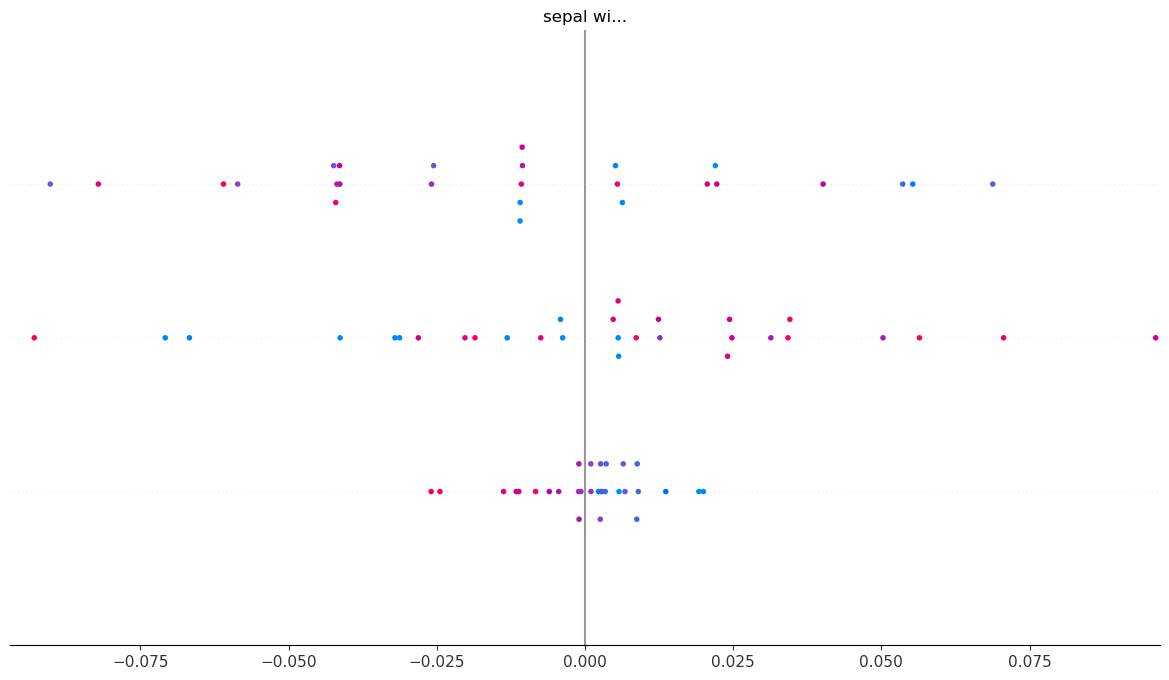

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import shap  # Ensure this is installed

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # Integer labels (0, 1, 2)
y_one_hot = to_categorical(y)  # One-hot encoded for model compatibility
classes = iris.target_names  # ['setosa', 'versicolor', 'virginica']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Load pre-trained model (assumes 'best_model.keras' exists)
model = load_model('best_model.keras')

# Get predictions (if not already generated)
y_pred_proba = model.predict(X_test)  # Predicted probabilities (2D array: [samples, classes])

# Classification Report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_proba, axis=1), 
                           target_names=iris.target_names))

# SHAP Explainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names)

# Learning Curves
def plot_learning_curves(history):
    """Plot training and validation loss/accuracy."""
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [112]:
import joblib

# Save model and scaler
joblib.dump(scaler, 'scaler.pkl')
model.save('iris_model.keras')

def predict_iris(data, model, scaler, class_names):
    """Predict Iris species for new data."""
    try:
        data_scaled = scaler.transform(data)
        predictions = model.predict(data_scaled)
        predicted_classes = np.argmax(predictions, axis=1)
        return [class_names[idx] for idx in predicted_classes]
    except Exception as e:
        logging.error(f"Prediction failed: {str(e)}")
        raise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


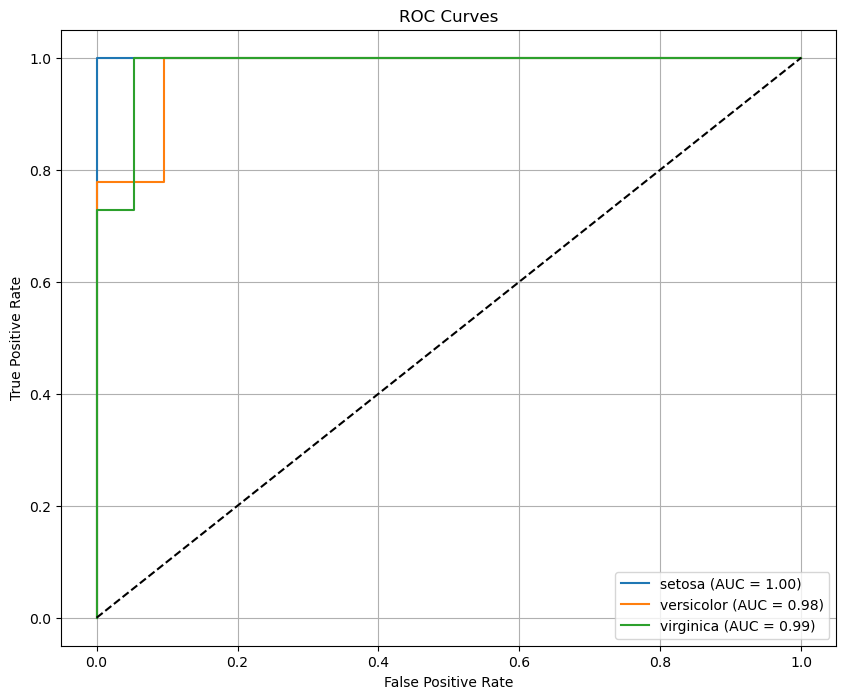

In [113]:
# Preprocess target for multiclass
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Predict probabilities
y_pred_proba = model.predict(X_test)

# Plot ROC for each class
plot_multiclass_roc(y_test, y_pred_proba, iris.target_names)

2025-06-07 17:24:35,996 - INFO - Iris dataset loaded successfully.


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5508 - loss: 1.4554 - val_accuracy: 0.5833 - val_loss: 1.4287
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6823 - loss: 1.3549 - val_accuracy: 0.5833 - val_loss: 1.3873
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6654 - loss: 1.3365 - val_accuracy: 0.5833 - val_loss: 1.3477
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6732 - loss: 1.2951 - val_accuracy: 0.5833 - val_loss: 1.3087
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6862 - loss: 1.2884 - val_accuracy: 0.5833 - val_loss: 1.2716
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6667 - loss: 1.2442 - val_accuracy: 0.5833 - val_loss: 1.2353
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6628 - loss: 1.2279 - val_accuracy: 0.5833 - val_loss: 1.2007
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6680 - loss: 1.2250 - val_accuracy: 0.5833 - val_loss: 1.1674

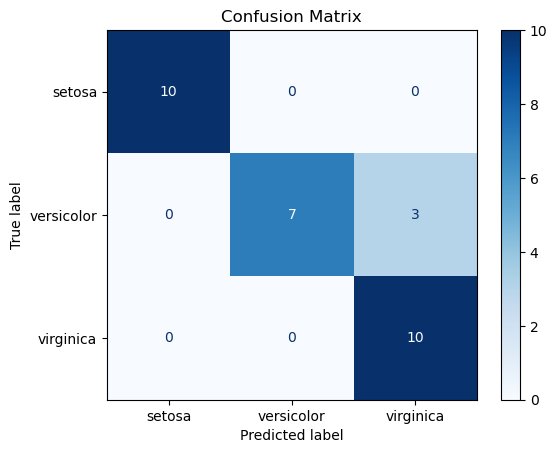

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Constants
RANDOM_STATE = 42
TEST_SIZE = 0.2
EPOCHS = 50
BATCH_SIZE = 32

# Load and preprocess data
def load_and_preprocess_iris():
    try:
        iris = load_iris()
        df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        df['target'] = iris.target
        df['species'] = df['target'].apply(lambda x: iris.target_names[x])
        logging.info("Iris dataset loaded successfully.")
        return df, iris.data, iris.target
    except Exception as e:
        logging.error(f"Failed to load dataset: {str(e)}")
        raise

# Build model
def build_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Main execution
if __name__ == "__main__":
    # Load data
    df, X, y = load_and_preprocess_iris()
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE, stratify=y)
    
    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Encode labels
    lb = LabelBinarizer()
    y_train = lb.fit_transform(y_train)
    y_test = lb.transform(y_test)
    
    # Build and train model
    model = build_model(X_train.shape[1], y_train.shape[1])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                        validation_split=0.2, callbacks=[early_stopping], verbose=1)
    
    # Evaluate model
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=iris.target_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Save model and scaler
    joblib.dump(scaler, 'scaler.pkl')
    model.save('iris_model.keras')